<a href="https://colab.research.google.com/github/gabsrcha/Telecom_X_Analysis/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#📌 Extracão

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
 df = pd.read_json('/content/drive/MyDrive/01. ALURA/Espec DATA/TelecomX_Data.json')

In [4]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

display(customer_df.head())
display(phone_df.head())
display(internet_df.head())
display(account_df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
df_flattened = df.merge(customer_df, left_index=True, right_index=True)
df_flattened = df_flattened.merge(phone_df, left_index=True, right_index=True)
df_flattened = df_flattened.merge(internet_df, left_index=True, right_index=True)
df_flattened = df_flattened.merge(account_df, left_index=True, right_index=True)

display(df_flattened.head())

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df_flattened = df_flattened.drop(['customer', 'phone', 'internet', 'account'], axis=1)
display(df_flattened.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:

display(df_flattened.head())
display(df_flattened.info())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


None

#🔧 Transformação

In [21]:
dff = df_flattened.copy()
for coluna in dff.columns:
  # if dff[coluna].value_counts().sum() <20:
    display(dff[coluna].unique())
    print()

    dff[coluna] = dff[coluna].replace(' ', pd.NA)

    if len(dff[coluna].unique()) > 5:
      if coluna == 'customerID':
        dff[coluna] = dff[coluna].astype('object')
        display(dff[coluna].unique())
      else:
        dff[coluna] = dff[coluna].astype('float64')
        display(dff[coluna].unique())

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

array(['No', 'Yes', ''], dtype=object)

array(['Female', 'Male'], dtype=object)

array([0, 1])

array(['Yes', 'No'], dtype=object)

array(['Yes', 'No'], dtype=object)

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

array([ 9.,  4., 13.,  3., 71., 63.,  7., 65., 54., 72.,  5., 56., 34.,
        1., 45., 50., 23., 55., 26., 69., 11., 37., 49., 66., 67., 20.,
       43., 59., 12., 27.,  2., 25., 29., 14., 35., 64., 39., 40.,  6.,
       30., 70., 57., 58., 16., 32., 33., 10., 21., 61., 15., 44., 22.,
       24., 19., 47., 62., 46., 52.,  8., 60., 48., 28., 41., 53., 68.,
       51., 31., 36., 17., 18., 38., 42.,  0.])

array(['Yes', 'No'], dtype=object)

array(['No', 'Yes', 'No phone service'], dtype=object)

array(['DSL', 'Fiber optic', 'No'], dtype=object)

array(['No', 'Yes', 'No internet service'], dtype=object)

array(['Yes', 'No', 'No internet service'], dtype=object)

array(['No', 'Yes', 'No internet service'], dtype=object)

array(['Yes', 'No', 'No internet service'], dtype=object)

array(['Yes', 'No', 'No internet service'], dtype=object)

array(['No', 'Yes', 'No internet service'], dtype=object)

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

array(['Yes', 'No'], dtype=object)

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

#📊 Carga e análise

In [22]:
dff.shape

(7256, 21)

In [23]:
display(dff['Charges.Monthly'].mean())
display(dff['Charges.Monthly'].median())

np.float64(64.75542309812569)

70.3

In [ ]:
for column in dff.columns:
  if dff[column].dtype == 'object':
    print(f"Column: {column}")
    print(dff[column].unique())
    print("-" * 30)

Column: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Column: Churn
['No' 'Yes' '']
------------------------------
Column: gender
['Female' 'Male']
------------------------------
Column: Partner
['Yes' 'No']
------------------------------
Column: Dependents
['Yes' 'No']
------------------------------
Column: PhoneService
['Yes' 'No']
------------------------------
Column: MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
------------------------------
Column: OnlineBackup
['Yes' 'No' 'No internet service']
------------------------------
Column: DeviceProtection
['No' 'Yes' 'No internet service']
------------------------------
Column: TechSupport
['Yes' 'No' 'No internet service']
------------------------------
Column: StreamingTV
['Yes' 'No' 

In [ ]:
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in categorical_cols:
    churn_distribution = dff.groupby([col, 'Churn']).size().unstack(fill_value=0)

    churn_distribution['Total'] = churn_distribution['Yes'] + churn_distribution['No']
    churn_distribution['Churn_Rate'] = (churn_distribution['Yes'] / churn_distribution['Total']).fillna(0)

    print(f"Distribuição Churn {col}:")
    display(churn_distribution)
    print("\n" + "="*50 + "\n")

Distribuição Churn gender:


Churn,,No,Yes,Total,Churn_Rate
gender,,,,,
Female,104,2544,939,3483,0.269595
Male,120,2619,930,3549,0.262046




Distribuição Churn SeniorCitizen:


Churn,,No,Yes,Total,Churn_Rate
SeniorCitizen,,,,,
0,184,4497,1393,5890,0.236503
1,40,666,476,1142,0.416813




Distribuição Churn Partner:


Churn,,No,Yes,Total,Churn_Rate
Partner,,,,,
No,108,2439,1200,3639,0.329761
Yes,116,2724,669,3393,0.197171




Distribuição Churn Dependents:


Churn,,No,Yes,Total,Churn_Rate
Dependents,,,,,
No,153,3390,1543,4933,0.312791
Yes,71,1773,326,2099,0.155312




Distribuição Churn PhoneService:


Churn,,No,Yes,Total,Churn_Rate
PhoneService,,,,,
No,25,510,170,680,0.250000
Yes,199,4653,1699,6352,0.267475




Distribuição Churn MultipleLines:


Churn,,No,Yes,Total,Churn_Rate
MultipleLines,,,,,
No,105,2536,849,3385,0.250812
No phone service,25,510,170,680,0.250000
Yes,94,2117,850,2967,0.286485




Distribuição Churn InternetService:


Churn,,No,Yes,Total,Churn_Rate
InternetService,,,,,
DSL,67,1957,459,2416,0.189983
Fiber optic,102,1799,1297,3096,0.418928
No,55,1407,113,1520,0.074342




Distribuição Churn OnlineSecurity:


Churn,,No,Yes,Total,Churn_Rate
OnlineSecurity,,,,,
No,110,2036,1461,3497,0.417787
No internet service,55,1407,113,1520,0.074342
Yes,59,1720,295,2015,0.146402




Distribuição Churn OnlineBackup:


Churn,,No,Yes,Total,Churn_Rate
OnlineBackup,,,,,
No,94,1854,1233,3087,0.399417
No internet service,55,1407,113,1520,0.074342
Yes,75,1902,523,2425,0.215670




Distribuição Churn DeviceProtection:


Churn,,No,Yes,Total,Churn_Rate
DeviceProtection,,,,,
No,100,1883,1211,3094,0.391403
No internet service,55,1407,113,1520,0.074342
Yes,69,1873,545,2418,0.225393




Distribuição Churn TechSupport:


Churn,,No,Yes,Total,Churn_Rate
TechSupport,,,,,
No,109,2026,1446,3472,0.416475
No internet service,55,1407,113,1520,0.074342
Yes,60,1730,310,2040,0.151961




Distribuição Churn StreamingTV:


Churn,,No,Yes,Total,Churn_Rate
StreamingTV,,,,,
No,86,1867,942,2809,0.335351
No internet service,55,1407,113,1520,0.074342
Yes,83,1889,814,2703,0.301147




Distribuição Churn StreamingMovies:


Churn,,No,Yes,Total,Churn_Rate
StreamingMovies,,,,,
No,85,1843,938,2781,0.337289
No internet service,55,1407,113,1520,0.074342
Yes,84,1913,818,2731,0.299524




Distribuição Churn Contract:


Churn,,No,Yes,Total,Churn_Rate
Contract,,,,,
Month-to-month,130,2220,1655,3875,0.427097
One year,46,1306,166,1472,0.112772
Two year,48,1637,48,1685,0.028487




Distribuição Churn PaperlessBilling:


Churn,,No,Yes,Total,Churn_Rate
PaperlessBilling,,,,,
No,84,2395,469,2864,0.163757
Yes,140,2768,1400,4168,0.335893




Distribuição Churn PaymentMethod:


Churn,,No,Yes,Total,Churn_Rate
PaymentMethod,,,,,
Bank transfer (automatic),45,1284,258,1542,0.167315
Credit card (automatic),46,1289,232,1521,0.152531
Electronic check,80,1294,1071,2365,0.452854
Mailed check,53,1296,308,1604,0.192020


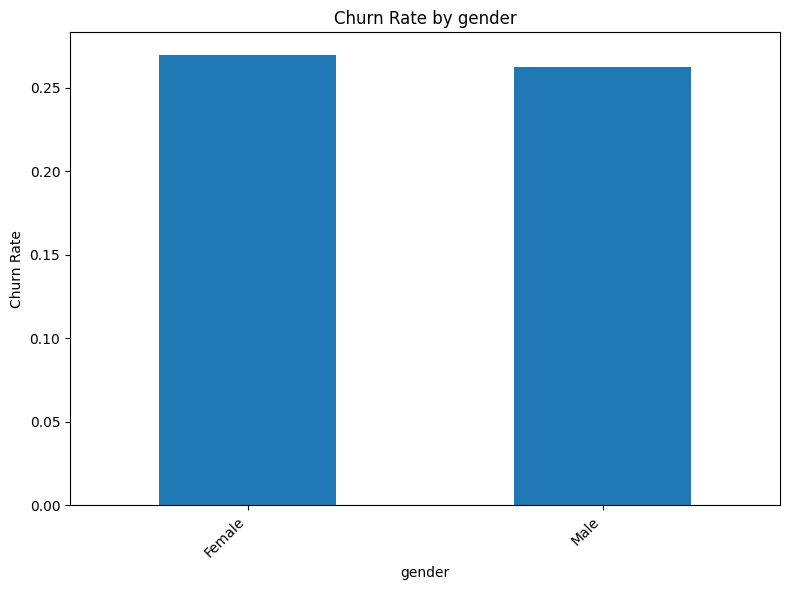

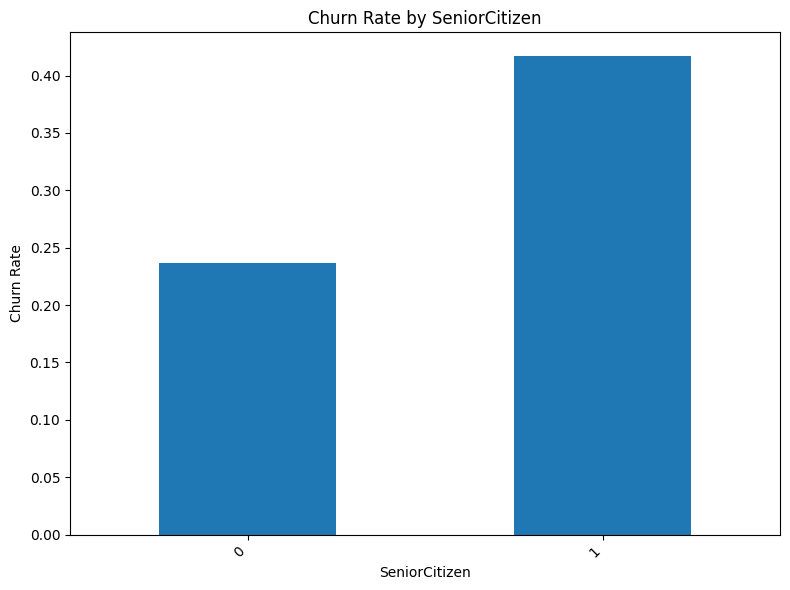

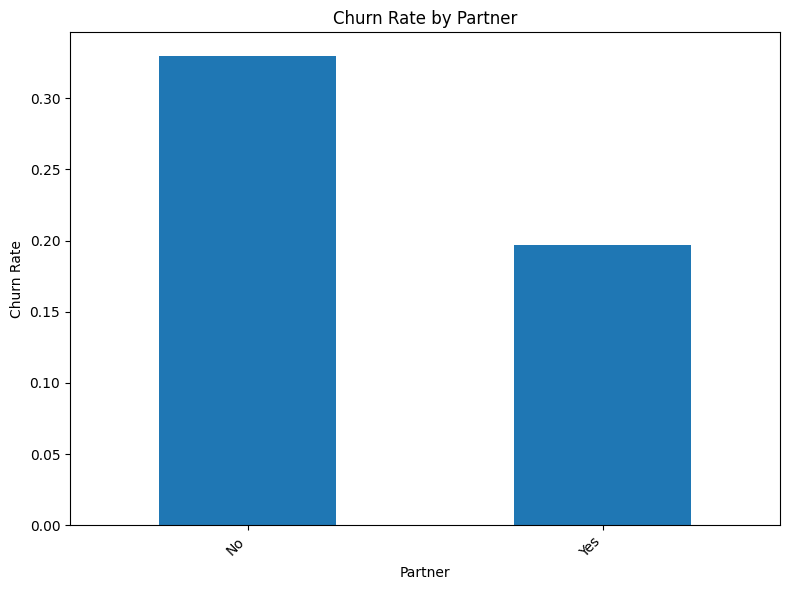

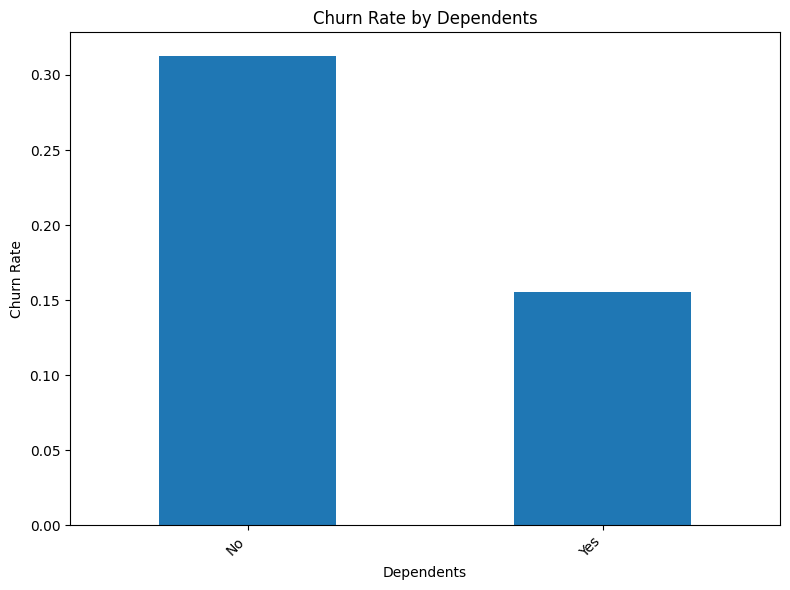

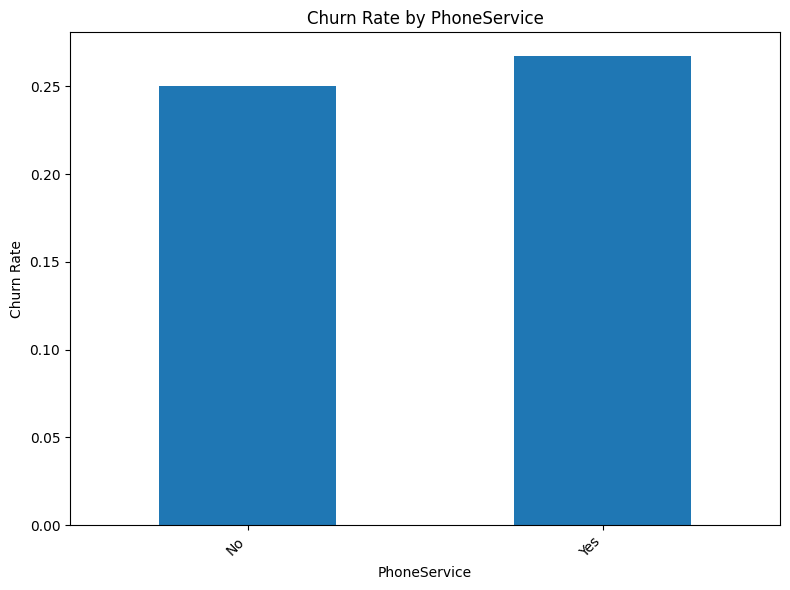

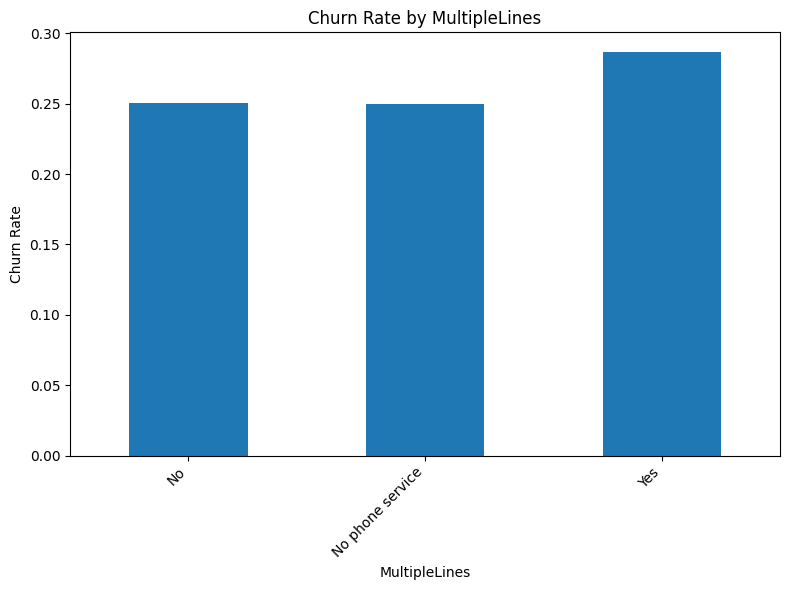

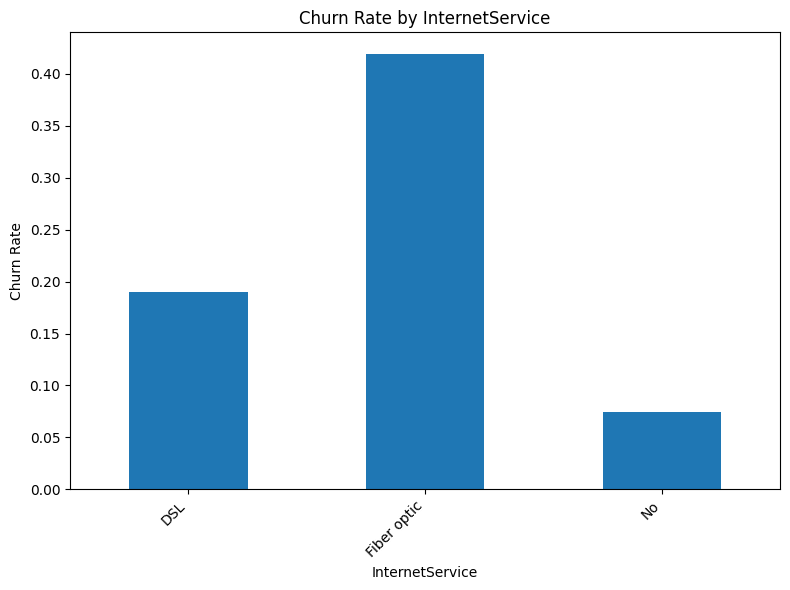

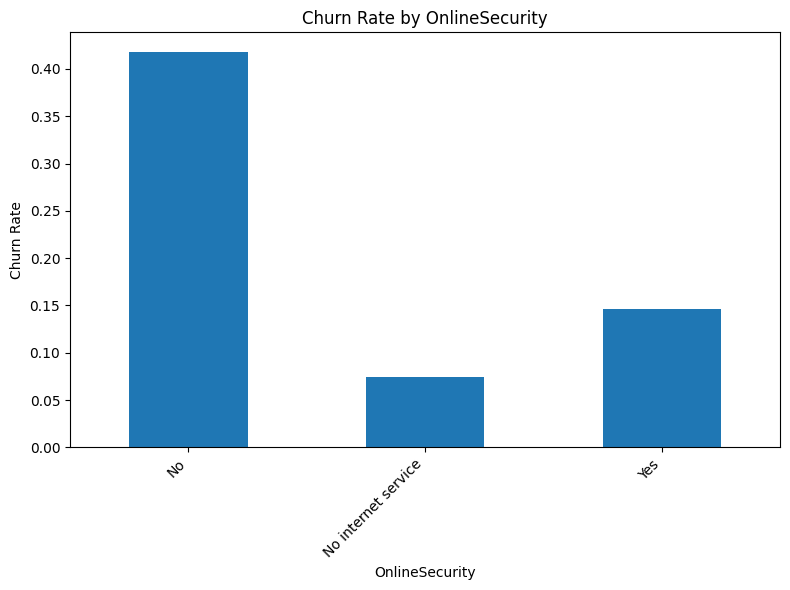

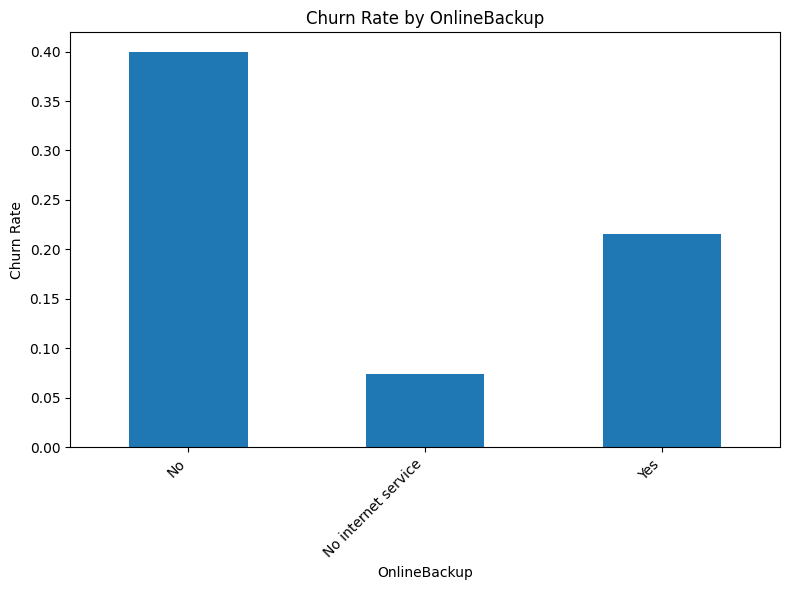

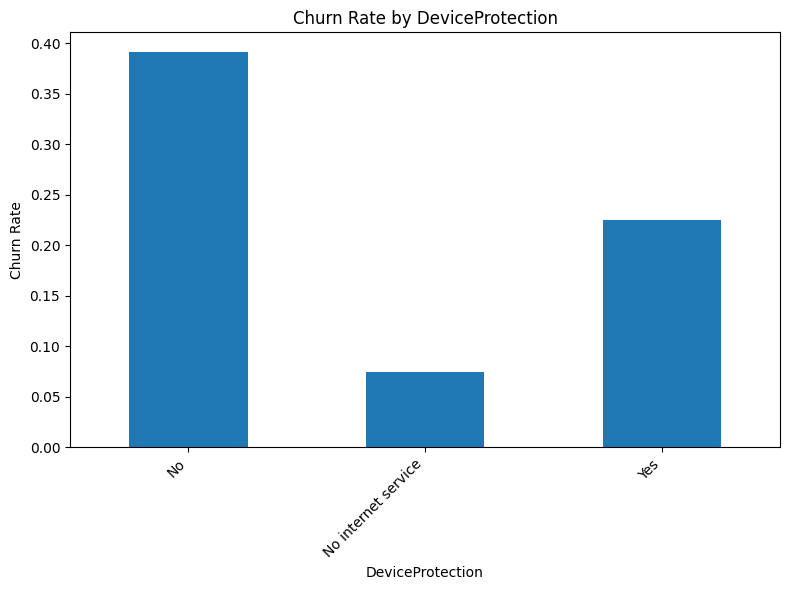

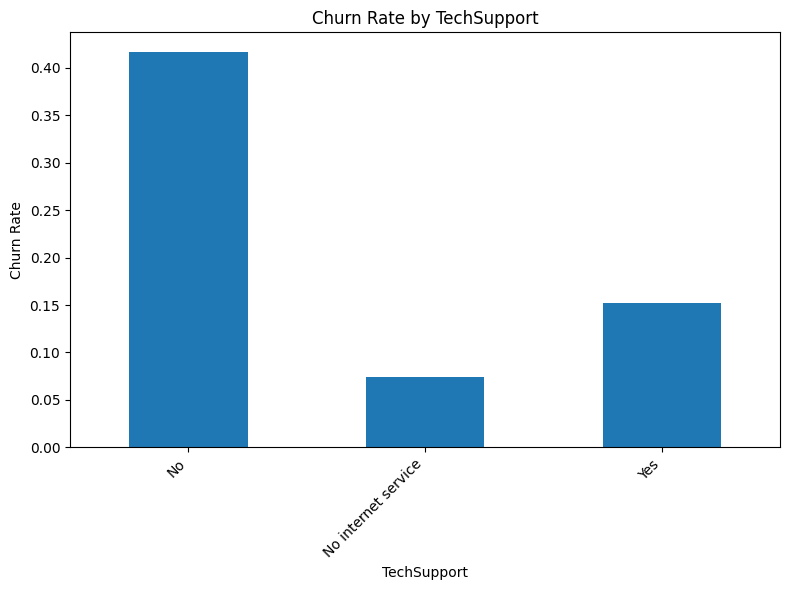

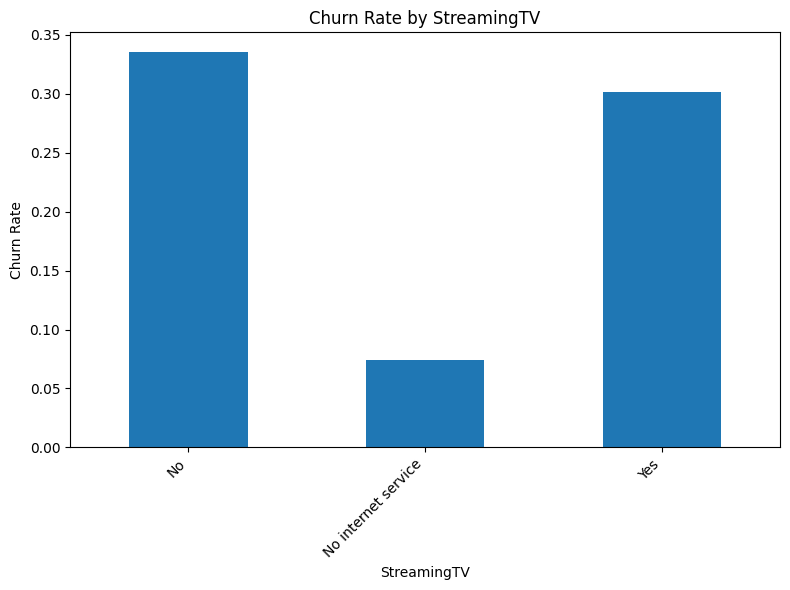

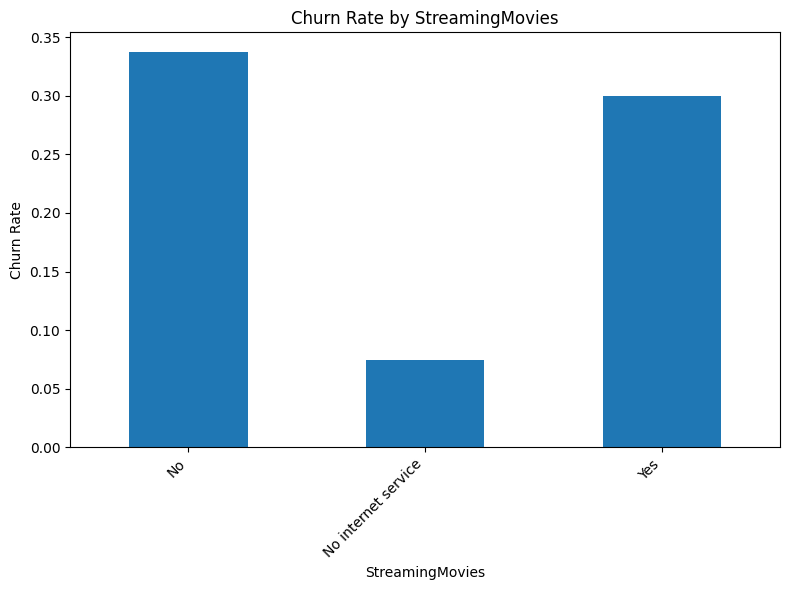

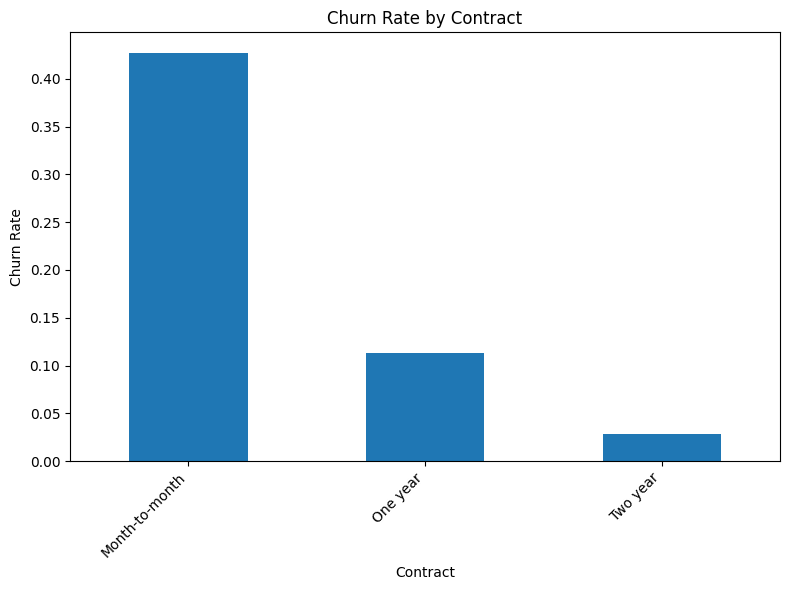

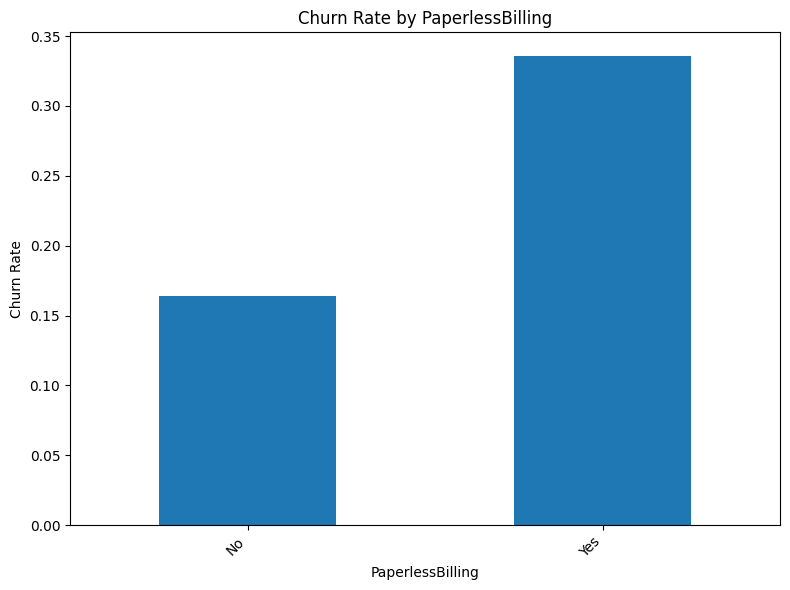

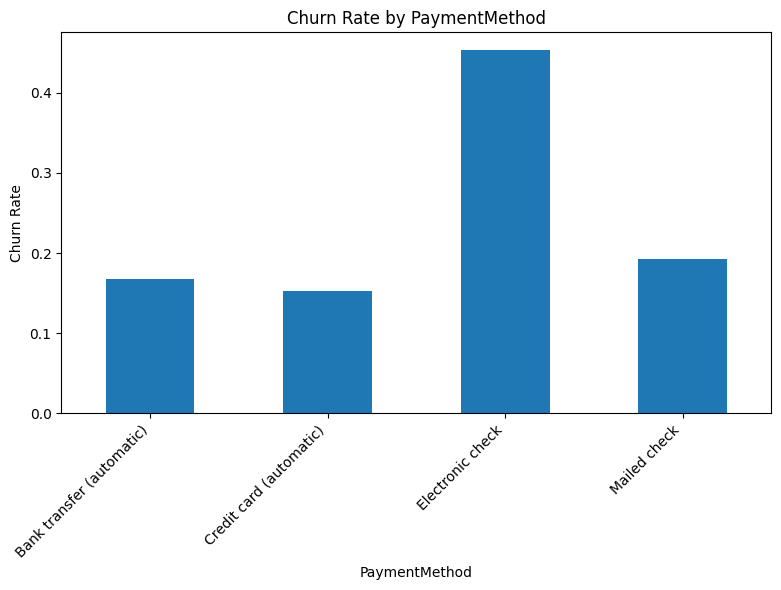

In [39]:
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in categorical_cols:
    churn_distribution = dff.groupby([col, 'Churn']).size().unstack(fill_value=0)

    # if 'Yes' not in churn_distribution.columns:
    #     churn_distribution['Yes'] = 0
    # if 'No' not in churn_distribution.columns:
    #     churn_distribution['No'] = 0

    churn_distribution['Total'] = churn_distribution['Yes'] + churn_distribution['No']
    churn_distribution['Churn_Rate'] = (churn_distribution['Yes'] / churn_distribution['Total']).fillna(0)

    plt.figure(figsize=(8, 6))
    churn_distribution['Churn_Rate'].plot(kind='bar')
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
for column in dff.columns:
  if dff[column].dtype in ['int64', 'float64']:
    print(f"Numerical column: {column}")

Numerical column: SeniorCitizen
Numerical column: tenure
Numerical column: Charges.Monthly
Numerical column: Charges.Total


In [ ]:
numerical_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']

for col in numerical_cols:
    print(f"Descrição: {col}")
    display(dff.groupby('Churn')[col].describe())
    print("\n" + "="*50 + "\n")

Descrição: SeniorCitizen


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
,224.0,0.178571,0.383851,0.0,0.0,0.0,0.0,1.0
No,5163.0,0.128995,0.335227,0.0,0.0,0.0,0.0,1.0
Yes,1869.0,0.254682,0.435799,0.0,0.0,0.0,1.0,1.0




Descrição: tenure


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
,224.0,31.571429,24.998552,1.0,7.0,29.0,56.0,72.0
No,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0




Descrição: Charges.Monthly


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
,224.0,63.412277,31.388712,18.75,28.425,69.10,90.4125,115.55
No,5163.0,61.307408,31.094557,18.25,25.100,64.45,88.4750,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.150,79.65,94.2000,118.35




Descrição: Charges.Total


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
,224.0,2196.933705,2329.961954,18.90,351.0375,1163.175,3562.8625,8425.30
No,5163.0,2555.344141,2329.456984,18.80,577.8250,1683.600,4264.1250,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5000,703.550,2331.3000,8684.80


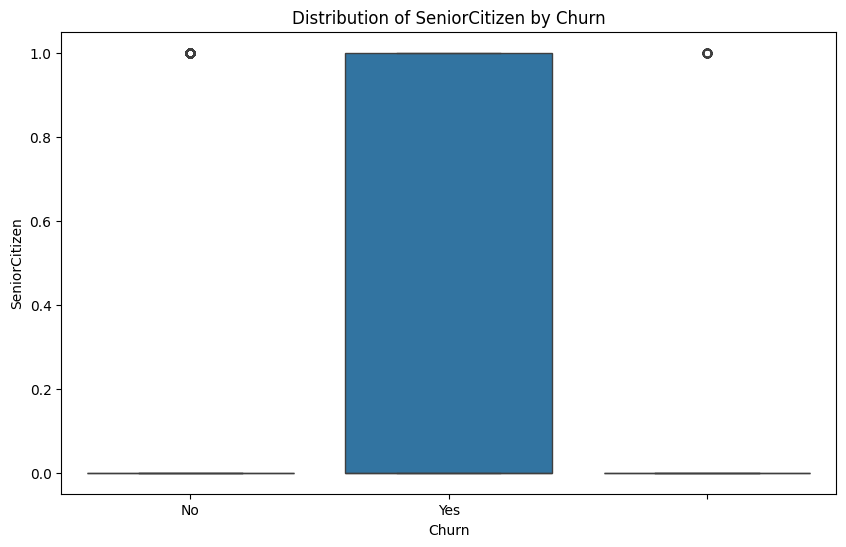

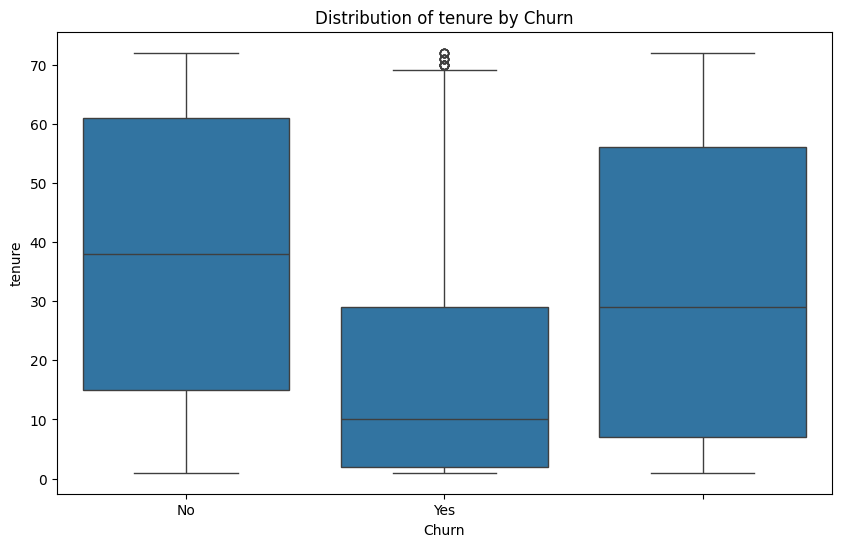

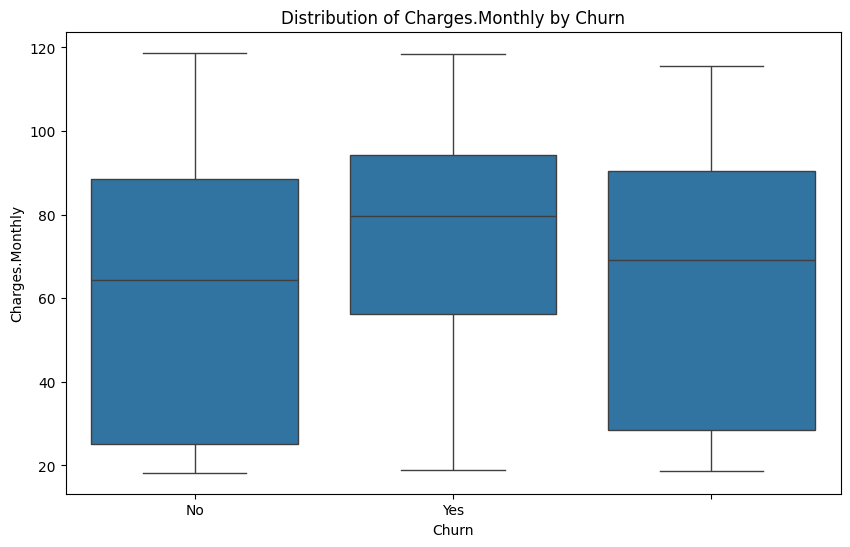

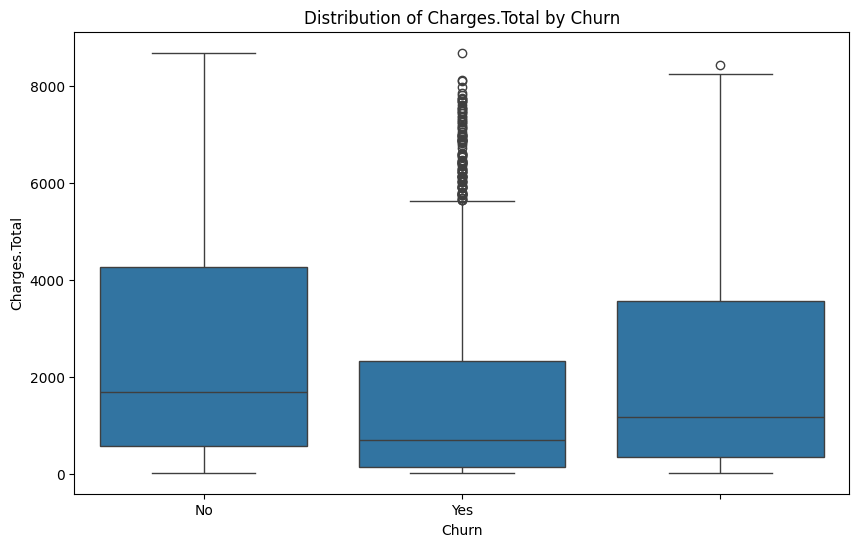

In [38]:
numerical_cols = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=col, data=dff)
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

#📄Relatorio Final

## Introdução

Este relatório apresenta uma análise exploratória dos dados de clientes de uma empresa de telecomunicações com o objetivo de identificar padrões e fatores que influenciam a evasão de clientes (Churn). A evasão de clientes é um desafio significativo para as empresas, pois reter clientes existentes é geralmente mais rentável do que adquirir novos.

## Limpeza e Tratamento de Dados

Os dados foram importados a partir de um arquivo JSON (`TelecomX_Data.json`). Inicialmente, o arquivo JSON continha informações aninhadas em colunas como 'customer', 'phone', 'internet', e 'account'. Para facilitar a análise, essas colunas aninhadas foram normalizadas e mescladas ao DataFrame principal

Durante a inspeção dos dados, foi identificado que a coluna 'Charges.Total' continha valores que não eram numéricos (espaços em branco). Esses valores foram substituídos por `NaN` (Not a Number) e a coluna foi convertida para o tipo numérico, tratando quaisquer outros valores não numéricos como `NaN` também.

## Análise Exploratória de Dados

A análise exploratória de dados foi realizada para entender a distribuição das variáveis e identificar possíveis relações com a evasão de clientes.

Os resultados, exibidos nos gráficos de barras gerados anteriormente, mostram as taxas de Churn para cada categoria. Por exemplo, observou-se que clientes com "Fiber optic" como InternetService e aqueles com contrato "Month-to-month" apresentaram taxas de Churn significativamente mais altas.

Os box plots gerados anteriormente ilustram essas distribuições. Foi observado que clientes que cancelaram tendem a ter menor tempo de contrato (`tenure`), maiores cobranças mensais (`Charges.Monthly`) e, consequentemente, menores cobranças totais (`Charges.Total`) devido ao menor tempo de permanência.

## Conclusões e Insights

Com base na análise exploratória, os seguintes insights foram obtidos:

*   **Senior Citizens e Churn:** Uma proporção maior de cidadãos seniores apresentou Churn.
*   **Tempo de Contrat:** Clientes com menor tempo de contrato têm maior probabilidade de cancelar.
*   **Cobranças Mensais:** Clientes com cobranças mensais mais altas mostram uma maior tendência ao Churn.
*   **Cobranças Totais:** As cobranças totais são menores devido ao menor tempo de serviço.
*   **Serviço de Internet e Contrato:** Clientes com serviço de internet Fiber optic e contratos mensais ("Month-to-month") são mais propensos a cancelar.
*   **Método de Pagamento:** O método de pagamento "Electronic check" parece estar associado a uma maior taxa de Churn.

## Recomendações

Com base nos insights, as seguintes recomendações são propostas para reduzir a evasão de clientes:

*   **Programas de Retenção para Novos Clientes:** Implementar programas de integração e acompanhamento para clientes nos primeiros meses de contrato, focando na satisfação e resolução de problemas iniciais.
*   **Revisão de Preços e Planos:** Avaliar a competitividade dos planos com internet Fiber optic e considerar opções para clientes com cobranças mensais elevadas.
*   **Incentivar Contratos de Longo Prazo:** Oferecer benefícios e descontos para clientes que optarem por contratos de um ou dois anos.
*   **Analisar o Processo de Pagamento Eletrônico:** Investigar possíveis problemas ou atritos no método de pagamento por Electronic check que possam estar contribuindo para o Churn.
*   **Segmentação e Campanhas Direcionadas:** Utilizar os perfis de clientes com maior probabilidade de Churn (Senior Citizens, menor tenure, Fiber optic, Month-to-month contract) para campanhas de retenção direcionadas.